In [1]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install keras


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

C:\Users\arifu\AppData\Local\Temp\ipykernel_20776\1776349605.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_prices['user_id'] = user_id
C:\Users\arifu\AppData\Local\Temp\ipykernel_20776\1776349605.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_prices['profit_loss'] = (stock_prices['Close'] - buy_price) * quantity
C:\Users\arifu\AppData\Local\Temp\ipykernel_20776\1776349605.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

   user_id  stock  initial_investment  current_profit_loss performance_status
0        1   AAPL                1500           230.403032             Profit
1        2  GOOGL               14000        -13328.434196               Loss
Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4135
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1654
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1158
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1292
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0886
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0977
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1298
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0952
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0981
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0746
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1244
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.

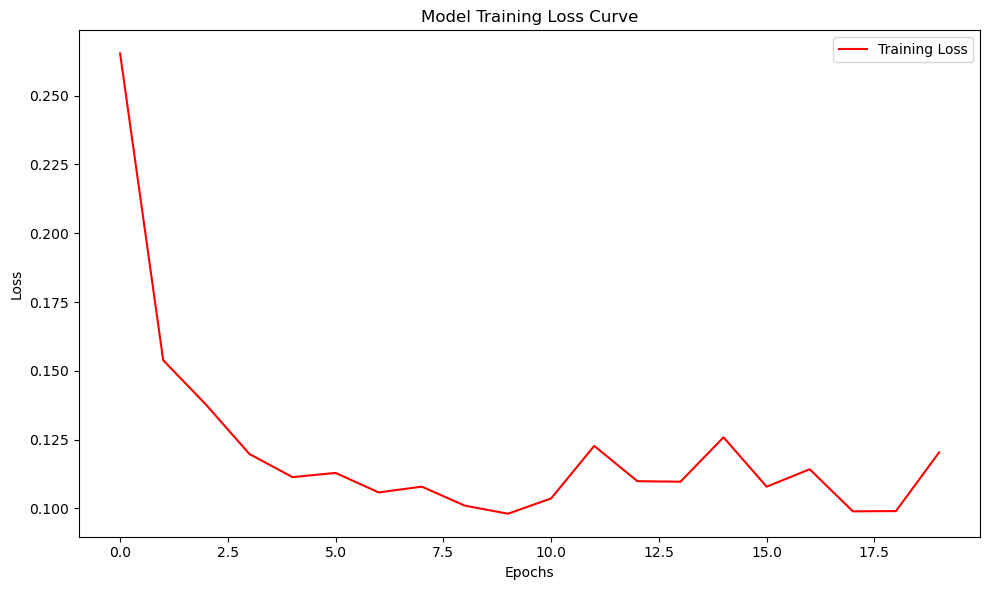

LSTM model trained successfully!


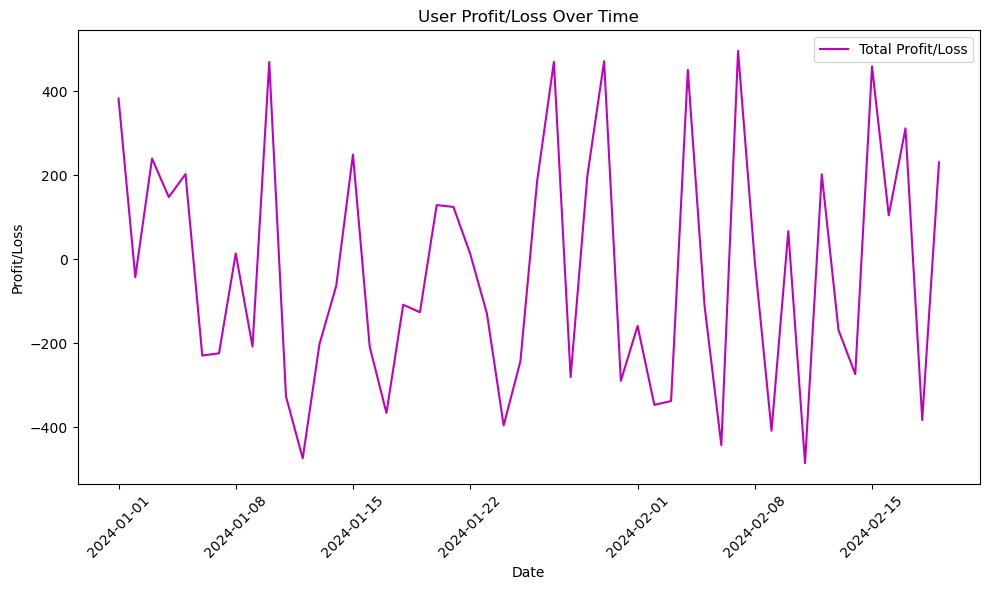

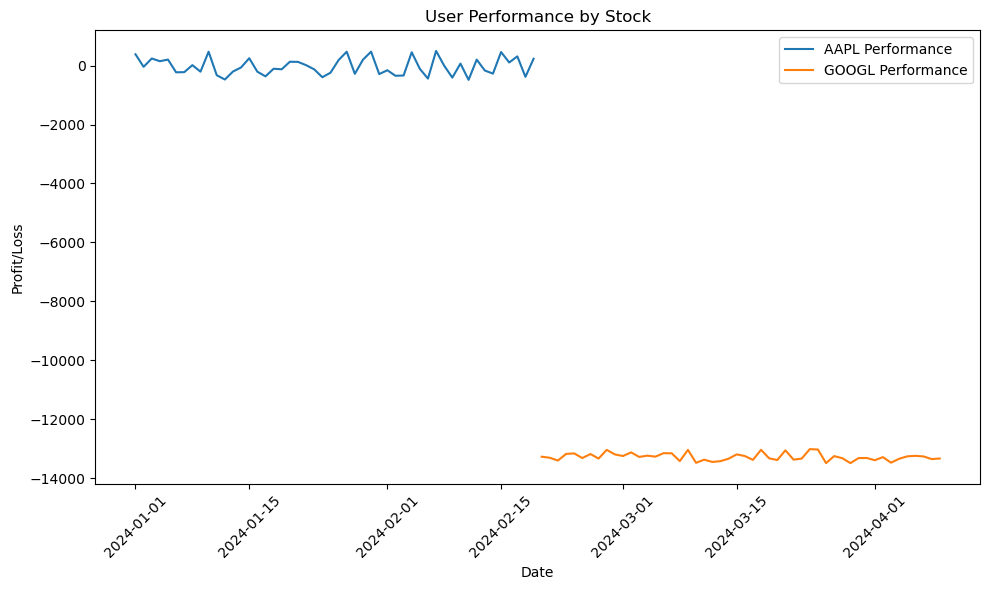

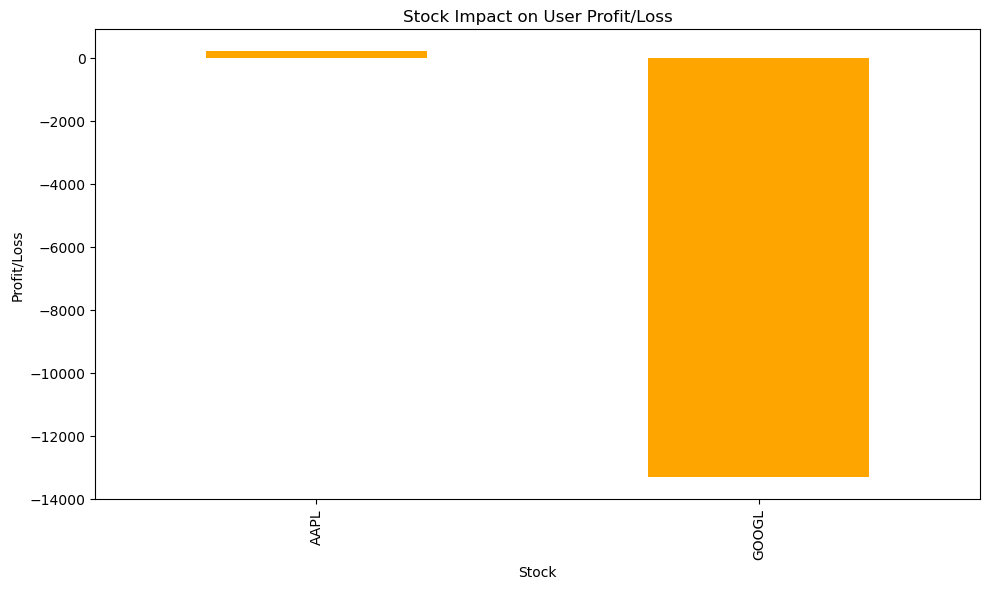

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

def calculate_performance(transactions, stock_data):
    performance = []
    user_performance = []

    for _, transaction in transactions.iterrows():
        user_id = transaction['user_id']
        stock = transaction['stock']
        buy_price = transaction['buy_price']
        quantity = transaction['quantity']
        date = transaction['date']

        stock_prices = stock_data[(stock_data['Stock'] == stock) & (stock_data['Date'] >= date)]

        stock_prices['user_id'] = user_id
        stock_prices['profit_loss'] = (stock_prices['Close'] - buy_price) * quantity
        stock_prices['performance_status'] = np.where(stock_prices['profit_loss'] > 0, 'Profit', 'Loss')

        user_perf = {
            'user_id': user_id,
            'stock': stock,
            'initial_investment': buy_price * quantity,
            'current_profit_loss': stock_prices['profit_loss'].iloc[-1],
            'performance_status': stock_prices['performance_status'].iloc[-1],
        }
        performance.append(user_perf)

        user_performance.append(stock_prices)

    return pd.DataFrame(performance), user_performance

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

if __name__ == "__main__":
    #nimma data illi haki, yakandre idu sumne hakirodu
    transactions = pd.DataFrame({
        'user_id': [1, 2],
        'stock': ['AAPL', 'GOOGL'],
        'buy_price': [150, 2800],
        'quantity': [10, 5],
        'date': ['2024-01-01', '2024-02-01']
    })

    stock_data = pd.DataFrame({
        'Date': pd.date_range(start='2024-01-01', periods=100),
        'Stock': ['AAPL'] * 50 + ['GOOGL'] * 50,
        'Close': np.random.uniform(100, 200, 100),
        'SMA': np.random.uniform(120, 180, 100)
    })
    user_performance, user_stock_data = calculate_performance(transactions, stock_data)
    print(user_performance)

    stock_prices = stock_data[stock_data['Stock'] == 'AAPL']['Close'].values
    scaler = MinMaxScaler()
    scaled_prices = scaler.fit_transform(stock_prices.reshape(-1, 1))

    x_train, y_train = [], []
    for i in range(30, len(scaled_prices)):
        x_train.append(scaled_prices[i-30:i, 0])
        y_train.append(scaled_prices[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    lstm_model = build_lstm_model((x_train.shape[1], 1))
    history = lstm_model.fit(x_train, y_train, batch_size=3, epochs=20)
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model Training Loss Curve')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("LSTM model trained successfully!")
    plt.figure(figsize=(10, 6))
    all_stock_data = pd.concat(user_stock_data, ignore_index=True)
    user_data = all_stock_data[all_stock_data['user_id'] == 1]
    plt.plot(user_data['Date'], user_data['profit_loss'], label='Total Profit/Loss', color='m')
    plt.xlabel('Date')
    plt.ylabel('Profit/Loss')
    plt.title('User Profit/Loss Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
#     plt.figure(figsize=(12, 6))
#     all_stock_data = pd.concat(user_stock_data, ignore_index=True)
#     user_data = all_stock_data[all_stock_data['user_id'] == 1]

#     plt.plot(user_data['Date'], user_data['profit_loss'], label='Total Profit/Loss', color='dodgerblue', linewidth=2)

#     plt.xlabel('Date', fontsize=12, fontweight='bold')
#     plt.ylabel('Profit/Loss ($)', fontsize=12, fontweight='bold')
#     plt.title('User Profit/Loss Over Time', fontsize=14, fontweight='bold', color='darkslategray')

#     plt.legend(loc='upper left', fontsize=10, frameon=False)

#     plt.xticks(rotation=45, fontsize=10, color='darkslategray')
#     plt.yticks(fontsize=10, color='darkslategray')

#     plt.grid(True, linestyle='--', alpha=0.6)
#     plt.tight_layout()

#     max_profit_point = user_data.loc[user_data['profit_loss'].idxmax()]
#     plt.annotate(f"Max Profit: {max_profit_point['profit_loss']:.2f}", 
#                  xy=(max_profit_point['Date'], max_profit_point['profit_loss']), 
#                  xytext=(max_profit_point['Date'], max_profit_point['profit_loss'] + 10),
#                  arrowprops=dict(arrowstyle='->', color='red'),
#                  fontsize=10, color='darkred')

    plt.show()


    plt.figure(figsize=(10,6))
    for stock in user_performance['stock']:
        stock_data_for_user = all_stock_data[all_stock_data['Stock'] == stock]
        plt.plot(stock_data_for_user['Date'], stock_data_for_user['profit_loss'], label=f'{stock} Performance')
    
    plt.xlabel('Date')
    plt.ylabel('Profit/Loss')
    plt.title('User Performance by Stock')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,6))
    stock_impact = user_performance.groupby('stock')['current_profit_loss'].max()
    stock_impact.plot(kind='bar', color='orange', title='Stock Impact on User Profit/Loss')
    plt.xlabel('Stock')
    plt.ylabel('Profit/Loss')
    plt.tight_layout()
    plt.show()


In [5]:
stock_data

,Date,Stock,Close,SMA
0,2024-01-01,AAPL,128.002098,177.398946
1,2024-01-02,AAPL,123.760392,134.127152
2,2024-01-03,AAPL,156.272706,179.576409
3,2024-01-04,AAPL,194.349776,153.114304
4,2024-01-05,AAPL,151.015647,127.145120
...,...,...,...,...
95,2024-04-05,GOOGL,184.313949,157.673913
96,2024-04-06,GOOGL,121.708093,124.602273
97,2024-04-07,GOOGL,169.822992,169.167690
98,2024-04-08,GOOGL,178.708660,135.526233


In [6]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from math import sqrt

# def calculate_performance(transactions, stock_data):
#     performance = []
#     user_performance = []

#     for _, transaction in transactions.iterrows():
#         user_id = transaction['user_id']
#         stock = transaction['stock']
#         buy_price = transaction['buy_price']
#         quantity = transaction['quantity']
#         date = transaction['date']

#         stock_prices = stock_data[(stock_data['Stock'] == stock) & (stock_data['Date'] >= date)]

#         stock_prices['user_id'] = user_id
#         stock_prices['profit_loss'] = (stock_prices['Close'] - buy_price) * quantity
#         stock_prices['performance_status'] = np.where(stock_prices['profit_loss'] > 0, 'Profit', 'Loss')

#         user_perf = {
#             'user_id': user_id,
#             'stock': stock,
#             'initial_investment': buy_price * quantity,
#             'current_profit_loss': stock_prices['profit_loss'].iloc[-1],
#             'performance_status': stock_prices['performance_status'].iloc[-1],
#         }
#         performance.append(user_perf)

#         user_performance.append(stock_prices)

#     return pd.DataFrame(performance), user_performance

# def build_lstm_model(input_shape):
#     model = Sequential()
#     model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
#     model.add(Dropout(0.2))
#     model.add(LSTM(50, return_sequences=False))
#     model.add(Dropout(0.2))
#     model.add(Dense(25))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model

# if __name__ == "__main__":
#     #illi nimma data haki
#     transactions = pd.DataFrame({
#         'user_id': [1, 2],
#         'stock': ['AAPL', 'GOOGL'],
#         'buy_price': [150, 2800],
#         'quantity': [10, 5],
#         'date': ['2024-01-01', '2024-02-01']
#     })

#     stock_data = pd.DataFrame({
#         'Date': pd.date_range(start='2024-01-01', periods=100),
#         'Stock': ['AAPL'] * 50 + ['GOOGL'] * 50,
#         'Close': np.random.uniform(100, 200, 100),
#         'SMA': np.random.uniform(120, 180, 100)
#     })

#     user_performance, user_stock_data = calculate_performance(transactions, stock_data)
#     print(user_performance)

    
#     stock_prices = stock_data[stock_data['Stock'] == 'AAPL']['Close'].values
#     scaler = MinMaxScaler()
#     scaled_prices = scaler.fit_transform(stock_prices.reshape(-1, 1))

#     x_train, y_train = [], []
#     for i in range(30, len(scaled_prices)):
#         x_train.append(scaled_prices[i-30:i, 0])
#         y_train.append(scaled_prices[i, 0])

#     x_train, y_train = np.array(x_train), np.array(y_train)
#     x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
#     lstm_model = build_lstm_model((x_train.shape[1], 1))
#     lstm_model.fit(x_train, y_train, batch_size=1, epochs=5)

#     print("model trained ")

   
#         # Visualizing the predictions vs actual values
#         plt.figure(figsize=(10, 6))
#         plt.plot(y_test_rescaled, label='Actual Stock Price', color='blue')
#         plt.plot(predictions_rescaled, label='Predicted Stock Price', color='red')
#         plt.xlabel('Time')
#         plt.ylabel('Stock Price')
#         plt.title('Stock Price Prediction vs Actual')
#         plt.legend()
#         plt.show()

#    
#     plt.figure(figsize=(10, 6))
#     all_stock_data = pd.concat(user_stock_data, ignore_index=True)
#     user_data = all_stock_data[all_stock_data['user_id'] == 1]
#     plt.plot(user_data['Date'], user_data['profit_loss'], label='Total Profit/Loss', color='blue')
#     plt.xlabel('Date')
#     plt.ylabel('Profit/Loss')
#     plt.title('User Profit/Loss Over Time')
#     plt.legend()
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


In [7]:
len(test_data)

NameError: name 'test_data' is not defined

In [ ]:
x_test.shape
